1.  The following table contains the outcome of classifying 10 testing tuples using a probabliistic classifier.  for each tuple, the actual class (P or N) is given in the second column, and the probability (of class P) returned by the classifier is in the third column.  

1 (a) For each row of the table, assume that the threshold of probability for predicting class P is the probability in that row, dtermine the numbers of:  
true positives (TP),  
false positives (FP),  
true negatives (TN),  
false negatives (FN),  
the true positive rate (TPR) and  
false positive rate (FPR)  
of the entire set of tuples.

In [1]:
import pandas as pd
import numpy as np
import math

dict1 = {1: pd.Series(["P", .95], index=['class', 'prob']),
         2: pd.Series(["N", .85], index=['class', 'prob']),
         3: pd.Series(["P", .78], index=['class', 'prob']),
         4: pd.Series(["P", .66], index=['class', 'prob']),
         5: pd.Series(["N", .60], index=['class', 'prob']),
         6: pd.Series(["P", .55], index=['class', 'prob']),
         7: pd.Series(["N", .53], index=['class', 'prob']),
         8: pd.Series(["N", .52], index=['class', 'prob']),
         9: pd.Series(["N", .51], index=['class', 'prob']),
         10: pd.Series(["P", .40], index=['class', 'prob']),
         }

df = pd.DataFrame(dict1).T

TP = ['TP']
FP = ['FP']
TN = ['TN']
FN = ['FN']
TPR = ['TPR']
FPR = ['FPR']

df_count = df['class'].value_counts()

for i in range(0, len(df.index)+1):
    up_slice = df.iloc[0:i+1]
         
    up_counts = up_slice['class'].value_counts()
        
    if 'P' in up_counts.index:
        TP.append(up_counts['P'])
    else:
        TP.append(0)
        
    if 'N' in up_counts.index:
        FP.append(up_counts['N'])
    else:
        FP.append(0)
    
    down_slice = df.iloc[i+1:]
        
    down_counts = down_slice['class'].value_counts()
        
    if 'N' in down_counts.index:
        TN.append(down_counts['N'])
    else:
        TN.append(0)
        
    if 'P' in down_counts.index:
        FN.append(down_counts['P'])
    else:
        FN.append(0)
    
    TPR.append(TP[-1] / df_count['P'])
    FPR.append(FP[-1] / df_count['N'])
    
df['TP'] = pd.Series(np.array(TP))
df['FP'] = pd.Series(np.array(FP))
df['TN'] = pd.Series(np.array(TN))
df['FN'] = pd.Series(np.array(FN))
df['TPR'] = pd.Series(np.array(TPR))
df['FPR'] = pd.Series(np.array(FPR))

print(df)

   class  prob TP FP TN FN  TPR  FPR
1      P  0.95  1  0  5  4  0.2  0.0
2      N  0.85  1  1  4  4  0.2  0.2
3      P  0.78  2  1  4  3  0.4  0.2
4      P  0.66  3  1  4  2  0.6  0.2
5      N   0.6  3  2  3  2  0.6  0.4
6      P  0.55  4  2  3  1  0.8  0.4
7      N  0.53  4  3  2  1  0.8  0.6
8      N  0.52  4  4  1  1  0.8  0.8
9      N  0.51  4  5  0  1  0.8  1.0
10     P   0.4  5  5  0  0  1.0  1.0


1. (b) Plot the ROC curve for the data

Text(0.5, 1.0, 'ROC Curve')

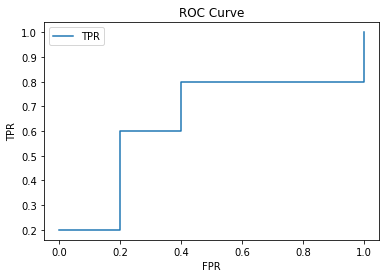

In [2]:
df['TPR']=df['TPR'].astype(float)
df['FPR']=df['FPR'].astype(float)

plot = df.plot.line(x ='FPR', y='TPR')
plot.set_xlabel("FPR")
plot.set_ylabel("TPR")
plot.set_title("ROC Curve")

2.  Suppose we have two predictive models, M1 and M2 and run 10 rounds of 10-fold cross-validation test using the two models.  The error rates obtained from the test are given in the following table.

2  (a) Training set and testing set are based on the same splits of a 10-fold cross-validation train/test dataset.  Perform a t-test at a significance level of 0.001.

In [3]:
dict2 = {1: pd.Series([30.5, 22.4], index=['m1', 'm2']),
         2: pd.Series([32.2, 14.5], index=['m1', 'm2']),
         3: pd.Series([20.7, 22.4], index=['m1', 'm2']),
         4: pd.Series([20.6, 19.6], index=['m1', 'm2']),
         5: pd.Series([31.0, 20.7], index=['m1', 'm2']),
         6: pd.Series([41.0, 20.4], index=['m1', 'm2']),
         7: pd.Series([27.7, 22.1], index=['m1', 'm2']),
         8: pd.Series([26.0, 19.4], index=['m1', 'm2']),
         9: pd.Series([21.5, 16.2], index=['m1', 'm2']),
         10: pd.Series([26.0, 35.0], index=['m1', 'm2']),
         }

df2 = pd.DataFrame(dict2).T

k = 10
degree_freedom = k - 1         # d_f = k -1
mean = df2.mean()
variance = 0

for i in range(len(df2.index)):
    variance += pow((df2.iloc[i]['m1'] - df2.iloc[i]['m2']) - (mean[0]-mean[1]), 2)
    
variance = variance / k

t = (mean[0] - mean[1]) / math.sqrt(variance / k)

significance_level = 0.001

t_distribution = 4.297

print("With a significance level of {0} and degrees of freedom being {1}, the t-score is {2}.".format(significance_level, degree_freedom, t_distribution))
print("\nOur t value, {0:4.3f}, is less than the t-distribution {1}, \nmeaning that we must accept the null hypothesis.".format(t, t_distribution))
print("There is no statistical difference between the models.")

With a significance level of 0.001 and degrees of freedom being 9, the t-score is 4.297.

Our t value, 2.471, is less than the t-distribution 4.297, 
meaning that we must accept the null hypothesis.
There is no statistical difference between the models.


2. (b) Models are built and tested independently.

In [4]:
degree_freedom = k

variance = 0
m1_var = 0
m2_var = 0

for i in range(len(df2.index)):
    m1_var += pow((df2.iloc[i]['m1'] - mean[0]), 2)
    m2_var += pow((df2.iloc[i]['m2'] - mean[1]), 2)
    
m1_var = m1_var / k
m2_var = m2_var / k

variance = (m1_var / k) + (m2_var / k)
    
t = (mean[0] - mean[1]) / math.sqrt(variance)

significance_level = 0.001

t_distribution = 4.297

print("With a significance level of {0} and degrees of freedom being {1}, the t-score is {2}.".format(significance_level, degree_freedom, t_distribution))
print("\nOur t value, {0:4.3f}, is less than the t-distribution {1}, \nmeaning that we must accept the null hypothesis.".format(t, t_distribution))
print("There is no statistical difference between the models.")

With a significance level of 0.001 and degrees of freedom being 10, the t-score is 4.297.

Our t value, 2.569, is less than the t-distribution 4.297, 
meaning that we must accept the null hypothesis.
There is no statistical difference between the models.


3.  Write a python jupyter notebook that performs a synchronized ten rounds 10-fold cross validation tests to obtain the classification accuracy scores for the Naive Bayesian and the AdaBoost classifiers learned from the dataset given in hwk07.csv, in which column H is the class label.  Specificially, in each round, the same training set should be used to train the classifiers, and the same testing set should be used to measure the classification accuracy scores.  Your program should use function from the scikit-learn to create random folds, to learn classifiers, to test the classifiers and to calculate classification accuracy scores.

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

x_cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
y_cols = ['H']

df3 = pd.read_csv("hwk07.csv")

df3 = df3.apply(pd.to_numeric)

X = df3[x_cols]

y = df3[y_cols]

cv = KFold(n_splits=10, random_state=1, shuffle=True)

nb_list = []
ada_list = []

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_nb = GaussianNB()
    
    model_nb.fit(X_train, y_train.values.ravel())
    
    nb_y_pred = model_nb.predict(X_test)
    
    nb_list.append(metrics.accuracy_score(y_test, nb_y_pred))
    
    model_ada = AdaBoostClassifier(random_state=0)
    
    model_ada.fit(X_train, y_train.values.ravel())
    
    ada_y_pred = model_ada.predict(X_test)
    
    ada_list.append(metrics.accuracy_score(y_test, ada_y_pred))
    
print("Accuracy of Naive Bayes and AdaBoost Classifiers\n")

print("Fold     Naive Bayes       AdaBoost")
print("-----------------------------------")
for i in range(len(nb_list)):
    print("  {2}         {0:4.2f}             {1:4.2f}".format(nb_list[i], ada_list[i], i))  

Accuracy of Naive Bayes and AdaBoost Classifiers

Fold     Naive Bayes       AdaBoost
-----------------------------------
  0         0.96             0.90
  1         0.90             0.92
  2         0.94             0.46
  3         0.96             0.84
  4         0.92             0.78
  5         0.94             0.88
  6         0.88             0.84
  7         0.90             0.84
  8         0.90             0.92
  9         0.94             0.86
